In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def load_image(image_path):
    """
        Đọc ảnh từ đường dẫn cho trước và trả về đối tượng ảnh
        Args: image_path
        Returns: đối tượng hình ảnh
    """
    try:
        img = Image.open(image_path)
        return img
    except Exception as e:
        print("Lỗi khi đọc hình ảnh từ: ", image_path, " ", e)
        return None

def is_image_file(file_path):
    """
        return: True - nếu là ảnh
                False - nếu khác ảnh
    """
    extensions =(".jpg", ".jpeg", ".png", ".gif", ".bmp")
    return file_path.lower().endswith(extensions);


def get_image_list(folder_path):
    image_list = []
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        filenames = os.listdir(folder_path)
        for filename in filenames:
            file_path=os.path.join(folder_path, filename)
            if  os.path.isfile(file_path) and is_image_file(file_path):
                img = load_image(file_path)
                image_list.append(img)
    return image_list

def histogram_equalization(image, nbr_bins=256):
    # Đảm bảo hình ảnh đầu vào là ảnh xám
    if image.mode != 'L':
        image = image.convert('L')
    
    # Chuyển đổi hình ảnh thành mảng NumPy
    image_array = np.array(image)

    # Tính toán histogram của ảnh
    histogram, bins = np.histogram(image_array, bins=nbr_bins, range=(0, 256), density=True)

    # Tính toán hàm phân phối tích luỹ (CDF - Cumulative Distribution Function)
    cdf = histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    # Lấy giá trị mới cho từng pixel dựa trên CDF
    image_equalized = np.interp(image_array, bins[:-1], cdf)

    # Chuyển đổi mảng kết quả thành hình ảnh
    equalized_image = Image.fromarray(image_equalized.astype('uint8'))

    return equalized_image

In [2]:
# Import lớp Image
from PIL import Image
from imgtools import *
from IPython.display import display # to display images

In [3]:
# Đường dẫn ảnh
my_path = 'E:/Data/image_500.jpg'

In [4]:
# Đọc ảnh 
img = load_image(my_path)

# Resize
# img = img.resize((250,250))

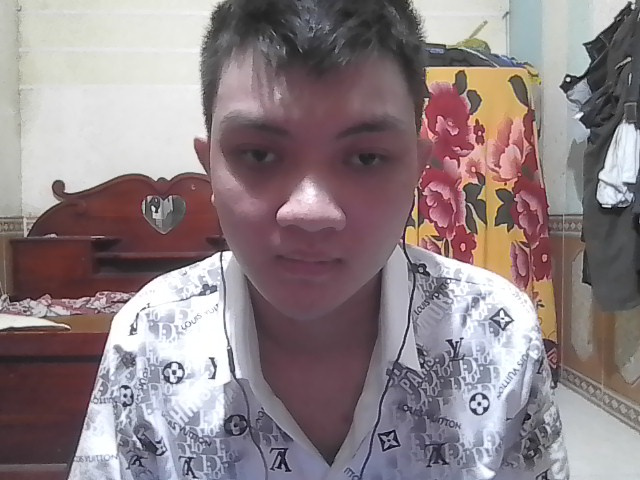

In [5]:
display(img)

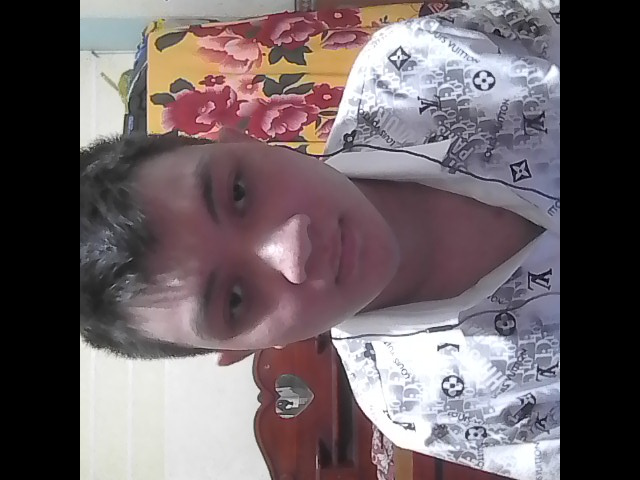

In [6]:
# Xoay ảnh
rotated_image = img.rotate(90)
display(rotated_image)

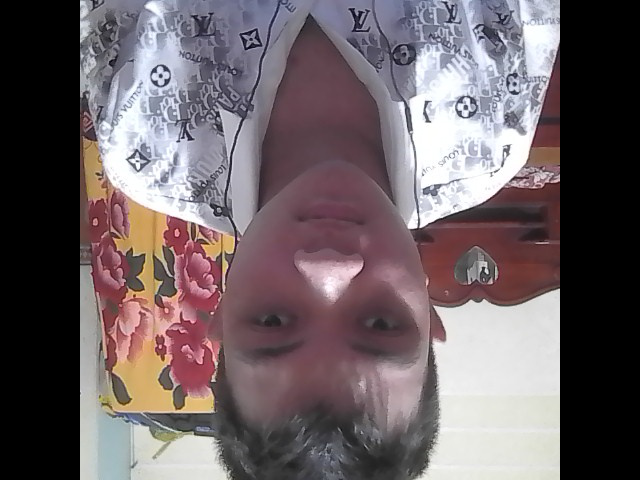

In [7]:
rotated_image = rotated_image.rotate(90)
display(rotated_image)

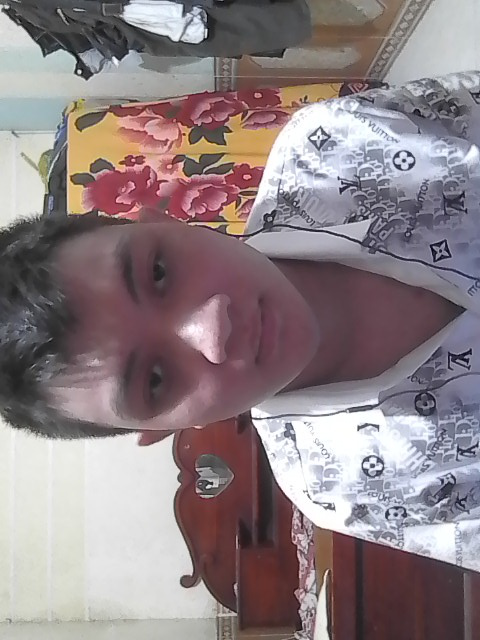

In [8]:
# Transpose ảnh
transposed_image = img.transpose(Image.Transpose.ROTATE_90)
display(transposed_image)

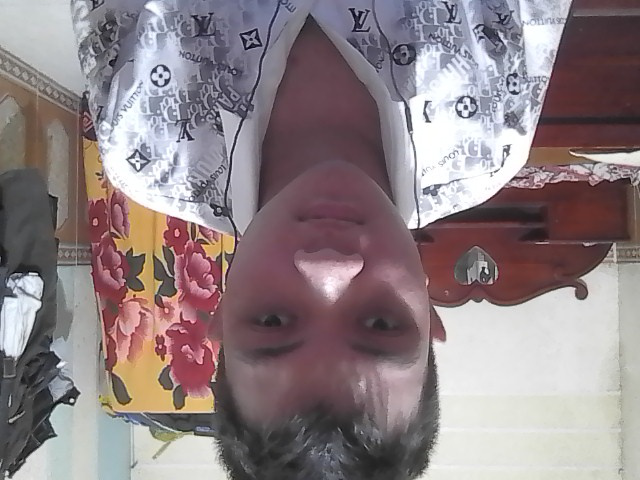

In [11]:
# Transpose ảnh
transposed_image = transposed_image.transpose(Image.Transpose.ROTATE_90)
display(transposed_image)